<a href="https://colab.research.google.com/github/ameervalki/Machine-Learning/blob/master/Spam_Ham_using_Sklearn_and_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
!pip install autoviml

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Ignore the Tensorflow Part

In [0]:
import tensorflow_datasets as tfds
import numpy as np
dataset,info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00',with_info=True,batch_size=-1)

In [49]:
dataset

{'train': {'data': {'customer_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
          b'35596948', b'29430209'], dtype=object)>,
   'helpful_votes': <tf.Tensor: shape=(85981,), dtype=int32, numpy=array([0, 3, 0, ..., 0, 0, 0], dtype=int32)>,
   'marketplace': <tf.Tensor: shape=(85981,), dtype=string, numpy=array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object)>,
   'product_category': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
          b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
         dtype=object)>,
   'product_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
   array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
          b'B000NURPPK', b'B001EY5GNW'], dtype=object)>,
   'product_parent': <tf.Tensor: shape=(8

# 1. Taking dataset and forming a dataframe

In [0]:
train_dataset= dataset['train']

In [53]:
dataset = tfds.as_numpy(train_dataset)
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [0]:
helpful_votes = dataset['data']['helpful_votes']
review_headline = dataset['data']['review_headline']
review_body = dataset['data']['review_body']
rating =  dataset['data']['star_rating']

In [0]:
df = pd.DataFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_headline[:,None],
                            rating[:,None])),columns = ['votes','headline','reviews','rating'])

In [0]:
covert_dict = {'votes':int,
               'headline':str,
               'reviews':str,
               'rating':int}

In [59]:
df = df.astype(covert_dict)
df

,votes,headline,reviews,rating
0,0,b'These glasses are an excellent value. The fi...,b'These glasses are an excellent value. The fi...,4
1,3,b'A fantastic way to cheaply try straight razo...,b'A fantastic way to cheaply try straight razo...,5
2,0,b'Great for travel',b'Great for travel',4
3,0,b'Five Stars',b'Five Stars',5
4,1,b'*Product sent not as shown',b'*Product sent not as shown',3
...,...,...,...,...
85976,2,b'YES!',b'YES!',5
85977,1,b'Bryton Picks',b'Bryton Picks',5
85978,0,b'Trimmer Not Working',b'Trimmer Not Working',3
85979,0,b'Loud and ineffectual',b'Loud and ineffectual',2


In [0]:
# Ignore till here

In [3]:
df = pd.read_table('spam.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


# 2. Input and Output

In [4]:
x = df.iloc[:,1]
y = df.iloc[:,0]
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object


# 3. Divide into train and test

In [0]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(df['message'],df['label'],test_size = 0.33,random_state = 42)

In [7]:
y_test

3245    ham
944     ham
1044    ham
2484    ham
812     ham
       ... 
4944    ham
3313    ham
3652    ham
14      ham
4758    ham
Name: label, Length: 1839, dtype: object

# 4. Feature Extraction

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range =(1,3) )

In [28]:
x_train_idf = tfidf_vectorizer.fit_transform(x_train)
x_train_idf

<3733x76722 sparse matrix of type '<class 'numpy.float64'>'
	with 146819 stored elements in Compressed Sparse Row format>

In [29]:
x_train_idf.shape

(3733, 76722)

# 5. Use NB Algorithm

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
model1 =  MultinomialNB()

# 6. Pipeline in Sklearn

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
text_model = Pipeline([('tfifd',TfidfVectorizer()),
                      ('model',MultinomialNB())])

In [58]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfifd',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# 7 . Predicting the output

In [0]:
y_pred = text_model.predict(x_test)

In [60]:
x_test

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                              ...                        
4944    Check mail.i have mailed varma and kept copy t...
3313    I know you are serving. I mean what are you do...
3652         Want to send me a virtual hug?... I need one
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
4758    hey, looks like I was wrong and one of the kap...
Name: message, Length: 1839, dtype: object

# 8. Evaluation

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
accuracy_score(y_test,y_pred)*100

96.19358346927677

In [63]:
confusion_matrix(y_test,y_pred)

array([[1593,    0],
       [  70,  176]])

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.72      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839



In [0]:
# In classification algorithm, output will be in specified categories
# Spam, Ham
# Postive, Negative

In [0]:
text_model.predict(['Hi How are you?'])

array(['ham'], dtype='<U4')

In [92]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,test = train_test_split(df,test_size = 0.33,random_state = 42)

In [97]:
train

,label,message,length,punct
3235,ham,Yup ü not comin :-(,19,3
945,ham,I sent my scores to sophas and i had to do sec...,221,4
5319,ham,Kothi print out marandratha.,28,1
5528,ham,Its just the effect of irritation. Just ignore it,49,1
247,ham,I asked you to call him now ok,30,0
...,...,...,...,...
3772,ham,"Hi, wlcome back, did wonder if you got eaten b...",81,3
5191,ham,"Sorry, I'll call later",22,2
5226,ham,Prabha..i'm soryda..realy..frm heart i'm sory,45,8
5390,ham,Nt joking seriously i told,26,0


In [99]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [100]:
print(test.shape)

(1839, 4)


In [0]:
from autoviml.Auto_NLP import Auto_NLP

In [102]:
nlp_column = 'message'
target = 'label'
type(nlp_column)
type(target)

str

In [103]:
print(type(nlp_column),type(train))

<class 'str'> <class 'pandas.core.frame.DataFrame'>


Auto NLP processing on NLP Column: message
Shape of Train Data: 3733 rows
    Shape of Test Data: 1839 rows


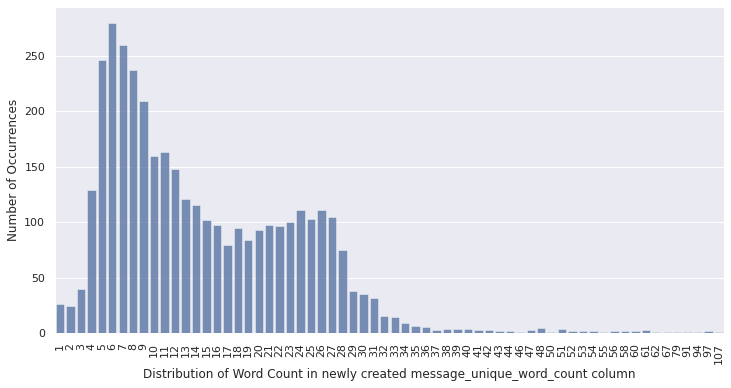

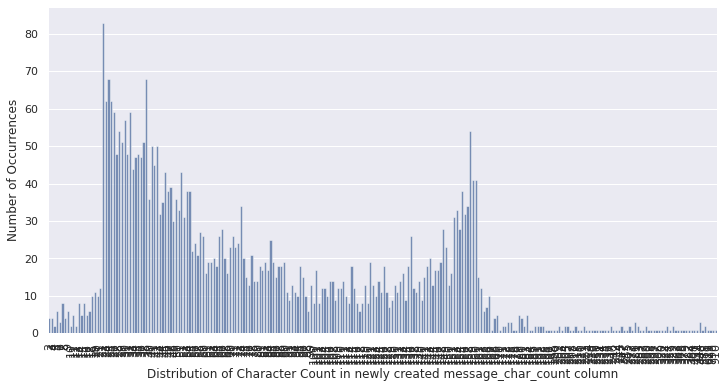

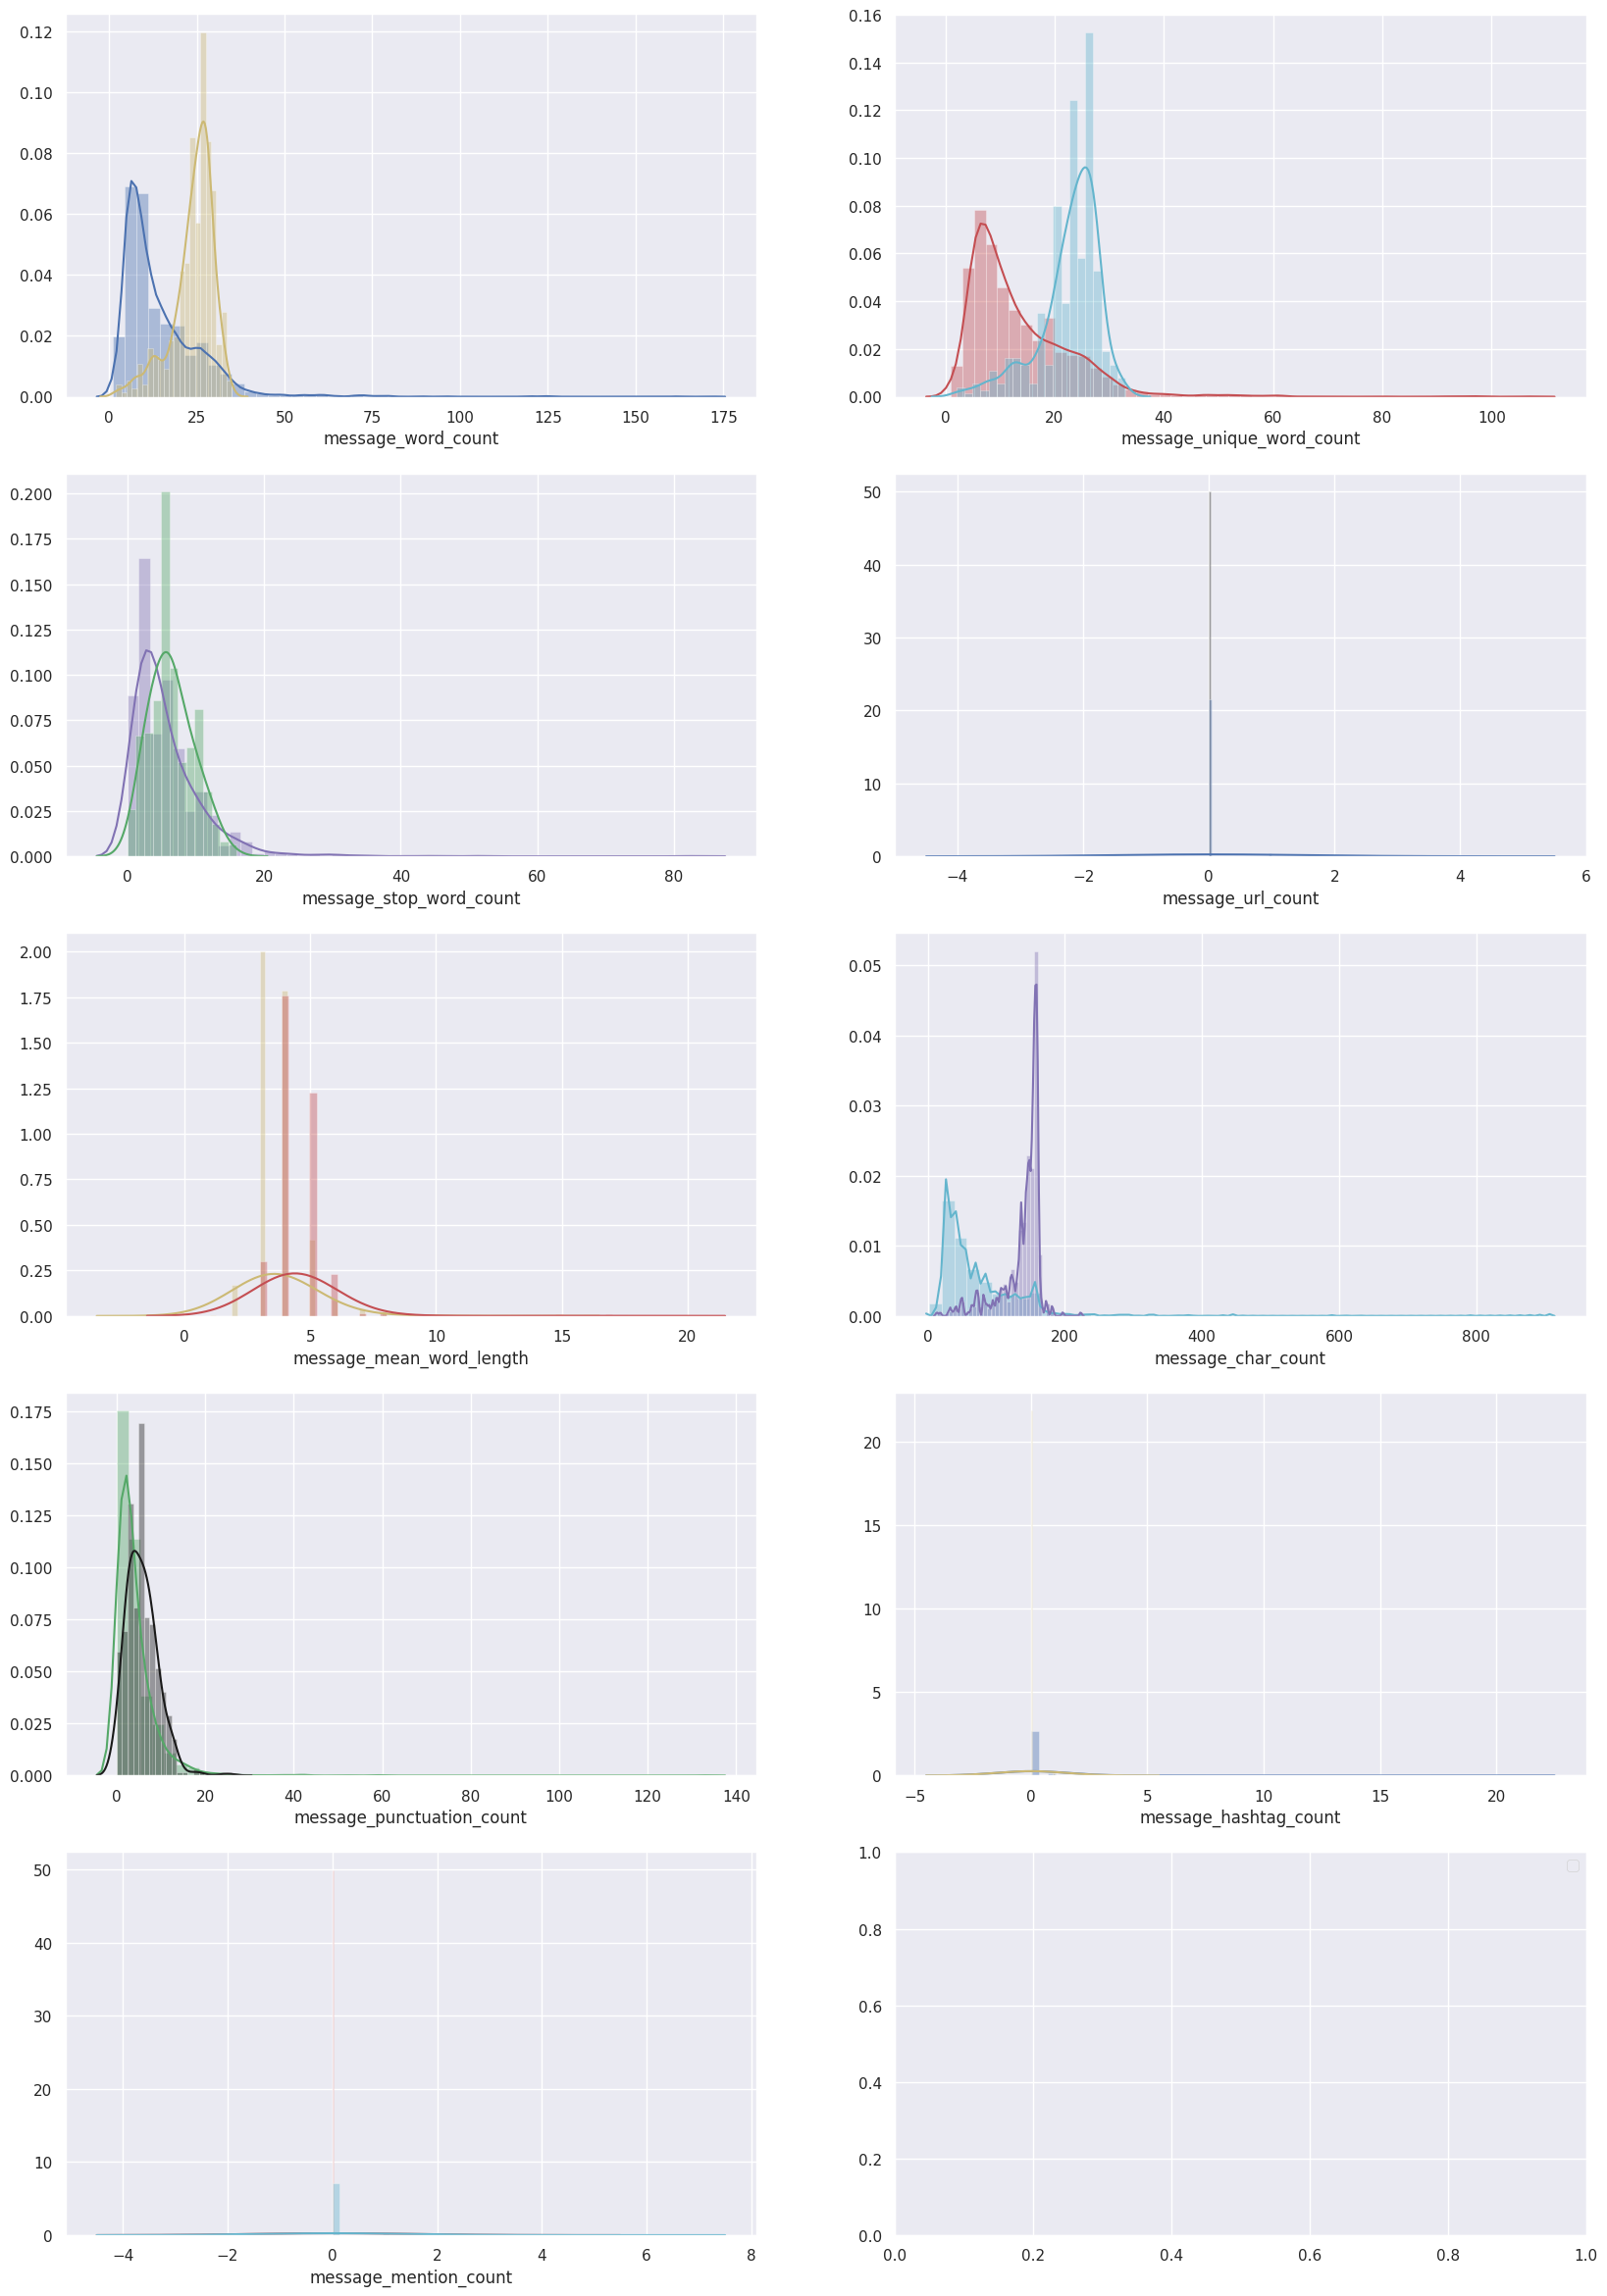

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in message before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 0 seconds
        Time Taken for Processing text in Train data = 6 seconds
            Time Taken for Stopword removal in Train data = 1 seconds
    Cleaning text in message before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 0 seconds
        Time Taken for Processing text in Test data = 3 seconds
            Time Taken for Stopword removal in Test data = 1 seconds
Train and Test data Text cleaning completed. Time taken = 3 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = message 
#################################################################################
Generating new feat

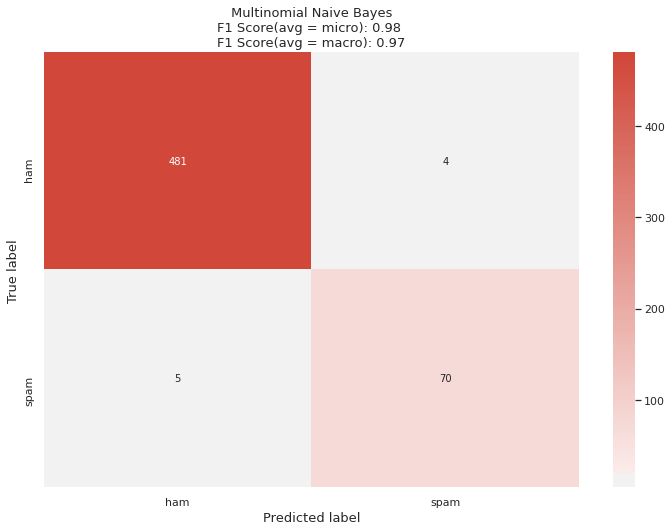

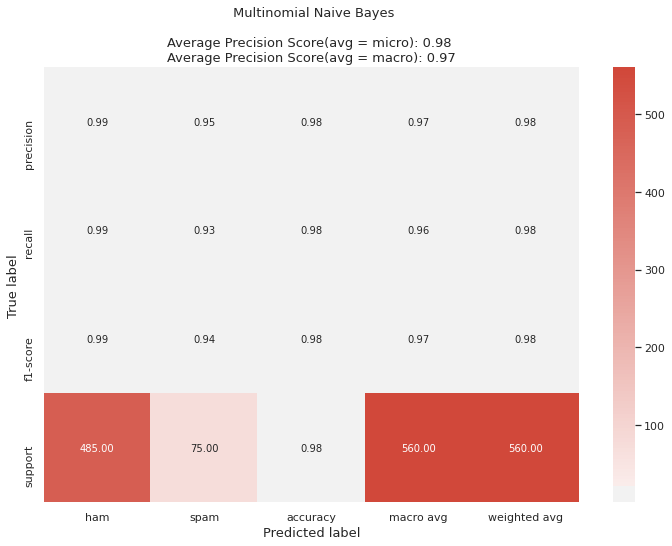

Training Pipeline on full Train data. This will take time...
    Time taken to train Pipeline on full Train shape ((3733,)) and test on ((1839, 13)) = 0.29 seconds
Time taken for Auto_NLP = 0.5 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [104]:

train_nlp,test_nlp,nlp_transformer,preds = Auto_NLP(nlp_column,train,test,target,score_type = 'balanced_accuracy',modeltype='Classification',
                                                    top_num_features=100,verbose=2,
                                                   build_model=True)

In [105]:
nlp_transformer

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.05, max_features=8565,
                                 min_df=2, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=True, token_pattern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.031446387626298145, class_prior=None,
                               fit_prior=True))],
         verbose=False)

In [106]:
y_pred = nlp_transformer.predict(test[nlp_column])
y_pred.size

1839

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [108]:
confusion_matrix(y_test,y_pred)

array([[1589,    4],
       [  30,  216]])

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1593
        spam       0.98      0.88      0.93       246

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839

